# Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Heart_Disease_Prediction.csv')
dataset

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [3]:
dataset.rename(columns={'Heart Disease': 'Target'}, inplace=True)
dataset

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [4]:
dataset['Target'] = dataset['Target'].map({'Presence': 1, 'Absence': 0 })
dataset

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


##### Accuracy

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)

X = dataset.drop('Target', axis=1)
y = dataset['Target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [7]:
np.mean(cross_val_score)

0.8148148148148149

In [9]:
print(f"Heart Disease classifier accuracy:{np.mean(cross_val_score)*100}%")

Heart Disease classifier accuracy:81.4814814814815%


##### Area under the receiver operating characteristic (ROC) curve 

 *ROC curves are a comparison of a model's True positive rate(tpr) Vs a model's false positive rate(fpr)*
 1. True positive: model predicts 1 and truth is 1
 2. False positive: model predicts 1 when truth is 0
 3. True negative: model predicts 0 when truth is 0
 4. True positive: model predicts 0 when truth is 1

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [11]:
from sklearn.metrics import roc_curve
#fit the classifier
clf.fit(X_train, y_train)
#Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.87, 0.13],
       [0.01, 0.99],
       [0.71, 0.29],
       [0.18, 0.82],
       [0.6 , 0.4 ],
       [0.49, 0.51],
       [0.05, 0.95],
       [0.92, 0.08],
       [0.98, 0.02],
       [0.75, 0.25]])

In [13]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.13, 0.99, 0.29, 0.82, 0.4 , 0.51, 0.95, 0.08, 0.02, 0.25])

In [14]:
#Calculate tpr, fpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
#check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.03703704,
       0.03703704, 0.07407407, 0.14814815, 0.14814815, 0.18518519,
       0.18518519, 0.33333333, 0.33333333, 0.40740741, 0.40740741,
       0.44444444, 0.51851852, 0.59259259, 0.62962963, 0.7037037 ,
       0.81481481, 0.92592593, 1.        ])

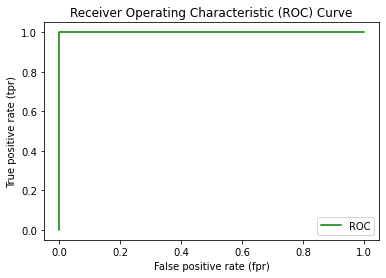

In [27]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    # Plot roc curve
    plt.plot(fpr, tpr, color="green", label="ROC")
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [28]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8984910836762688

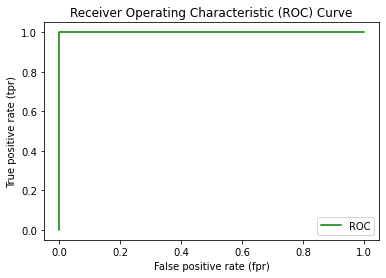

In [29]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [30]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

#### Confusion Matrix

Confusion matrix is a way to compare the labels a model predicts and the actual labels it was supposed to predict

In [32]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[24,  3],
       [ 9, 18]], dtype=int64)

In [33]:
#visualize confusion matrix using pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=['Actual label'], colnames=['Predicted label'])

Predicted label,0,1
Actual label,,
0,24,3
1,9,18


In [36]:
len(X_test), len(y_preds)

(54, 54)

<AxesSubplot:>

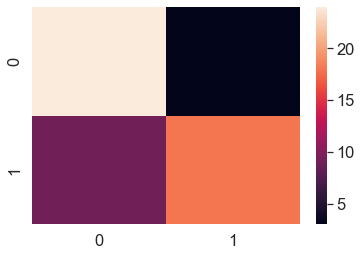

In [37]:
#Confusion matrix using seaborn
import seaborn as sns
#set the font scale
sns.set(font_scale=1.5)

#create confusion matrix
conf_matrix = confusion_matrix(y_test, y_preds)

#plot heatmap
sns.heatmap(conf_matrix)

In [39]:
import sklearn
sklearn.__version__

'1.0.2'

### Creating confusion matrix using sklearn

In [40]:
clf

RandomForestClassifier()

C:\Users\admin\Desktop\sampleproj\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


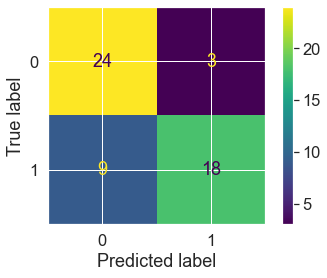

In [45]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test);

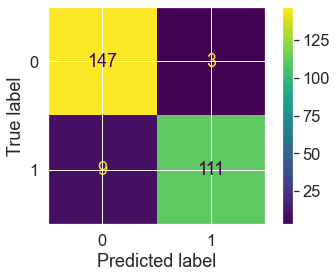

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

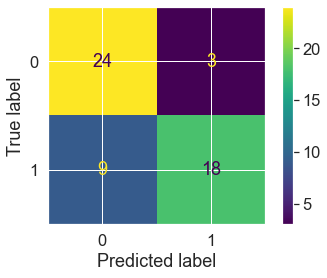

In [47]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

#### Classification Report

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        27
           1       0.86      0.67      0.75        27

    accuracy                           0.78        54
   macro avg       0.79      0.78      0.77        54
weighted avg       0.79      0.78      0.77        54

